In [136]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from nltk.corpus import stopwords
import pandas as pd
import numpy as np

In [137]:
from sklearn.linear_model import LinearRegression

df = pd.read_csv(r"C:\Users\Jurgen\Desktop\FYP\Shared\News_Twitter_Stock_Data.csv")
df = df.dropna()
X = df[["News_Senti", "Twitter_Senti"]]
y = df["Stock_Difference"]


In [168]:
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=0)
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# print(x_train.shape)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
# The intercept
print("Intercept: ", regr.intercept_)

Coefficients: 
 [0.9293194  0.08700246]
Mean squared error: 0.51
Coefficient of determination: -0.02
Intercept:  -0.14902419255241306


30

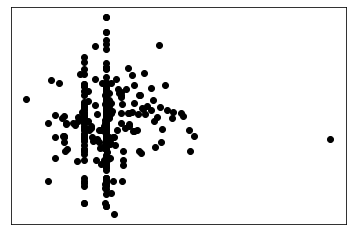

(122, 2) (122,)
(122, 2) (122,)


In [163]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(T_Senti, y_train,  color='black')
# plt.plot(X_test, y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

print(X_test.shape, y_test.shape)
print(X_test.shape, y_pred.shape)

# print(y_pred)



In [161]:
N_Senti = X_train.News_Senti.values
T_Senti = X_train.Twitter_Senti.values


In [148]:
test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test

,Actual,Predicted
15,-0.166406,0.020667
250,-0.818160,0.133255
142,-0.783998,-0.010160
355,0.138912,-0.064282
90,-0.895421,0.020667
...,...,...
435,0.486661,0.061182
124,2.144973,0.026895
225,0.090117,-0.031967
191,-0.792757,-0.022687


In [134]:
from sklearn.ensemble import RandomForestRegressor

text_classifier = RandomForestRegressor(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
y_pred = text_classifier.predict(X_test)



# from sklearn import neighbors

# knn = neighbors.KNeighborsRegressor(n_neighbors = 5)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)

In [135]:
from sklearn import metrics

print("Error:",metrics.mean_absolute_error(y_test, y_pred))
print("R^2: ", metrics.r2_score(y_test, y_pred))
print("Max Error: ", metrics.max_error(y_test, y_pred))
print("Variance Score: ", metrics.explained_variance_score(y_test, y_pred))

Error: 0.6087252552116237
R^2:  -0.2924316154204165
Max Error:  2.545449856731488
Variance Score:  -0.28756468223124965


In [132]:
predictions = text_classifier.predict(X_test)

In [133]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.6087252552116237
Mean Squared Error: 0.6507483543174033
Root Mean Squared Error: 0.8066897509683654
